NameError: name 'max_value' is not defined

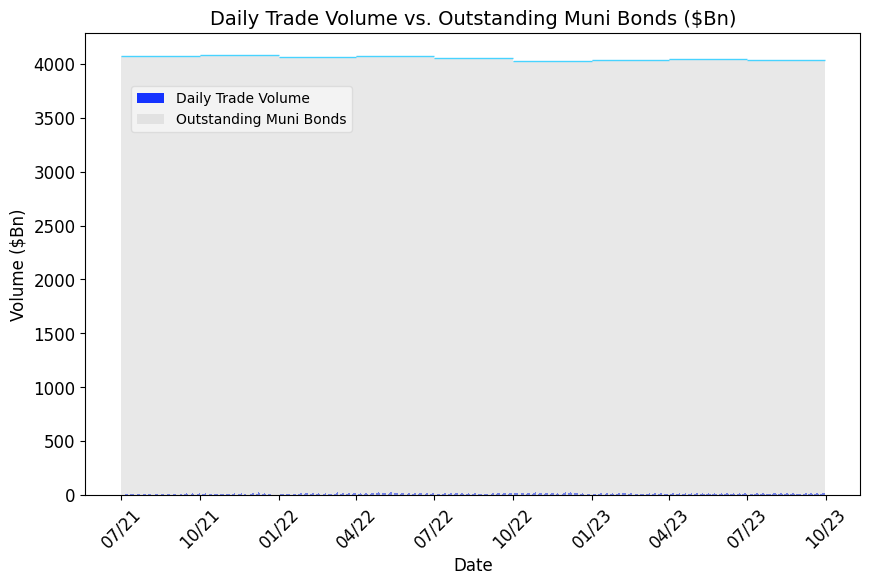

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Load the daily trade volume data
file_path = '/Users/gil/Downloads/daily_trade_volume.csv'
daily_trade_volume_df = pd.read_csv(file_path)
daily_trade_volume_df['trade_date'] = pd.to_datetime(daily_trade_volume_df['trade_date'])

# Sample data for outstanding values and quarter dates
outstanding_values_bn = [4071.3, 4081.3, 4064.0, 4068.2, 4051.7, 4028.8, 4032.8, 4048.4, 4037.9]
quarter_dates = pd.date_range(start="2021-07-01", periods=len(outstanding_values_bn), freq='QS-JUL')

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each quarter bar to cover the entire quarter with no gaps
quarter_widths = np.diff(mdates.date2num(quarter_dates)).tolist()
# For the last quarter bar, we use the average of the previous widths
quarter_widths.append(np.mean(quarter_widths))

# Plot daily trade volume
ax.bar(daily_trade_volume_df['trade_date'], daily_trade_volume_df['daily_trade_volume'] / 1e9, color='#1533FF', label='Daily Trade Volume', width=1)

# Plot outstanding municipal bonds volume as quarterly bars


for i, (start_date, width) in enumerate(zip(quarter_dates, quarter_widths)):
    if i == 0:  # Only add the label for the first bar to avoid duplicates in the legend
        ax.bar(start_date, outstanding_values_bn[i], width=width, color='lightgrey', label='Outstanding Muni Bonds', align='edge', alpha=0.5)
    else:
        ax.bar(start_date, outstanding_values_bn[i], width=width, color='lightgrey', align='edge', alpha=0.5)

from matplotlib.patches import Rectangle

# ... (your plotting code for the bars goes here) ...

# Add a thin line on top of each bar to represent the top edge
for i, (start_date, width) in enumerate(zip(quarter_dates, quarter_widths)):
    # Calculate the top left corner of the rectangle
    rect_x = mdates.date2num(start_date)
    rect_y = outstanding_values_bn[i]

    # Create a rectangle that's essentially a line by making it very thin
    line = Rectangle((rect_x, rect_y), width, 0.001, color='#48d3ff', linewidth=1)  # The height is set to a very small number
    ax.add_patch(line)


# for i, (start_date, width) in enumerate(zip(quarter_dates, quarter_widths)):
#     ax.bar(start_date, outstanding_values_bn[i], width=width, color='lightgrey', align='edge', alpha=0.5)

# Set labels and tick parameters
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volume ($Bn)', fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend = ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(0.05, 0.9), prop={'size': 10}, framealpha=0.5)

# Title and annotations
concise_title = "Daily Trade Volume vs. Outstanding Muni Bonds ($Bn)"
plt.title(concise_title, fontsize=14)

# Annotations
# ... Your annotation code here ...


# # Adjust the y-axis limits to ensure there's enough room for the annotation at the top
# ax.set_ylim(0, max_value + additional_space)

# # Annotation for "LOTS OF BONDS…"
plt.annotate('LOTS OF BONDS…', 
             xy=(quarter_dates[-1], max_value + (additional_space * -0.1)),  # Use the last quarter date and adjust y-position accordingly
             xytext=(quarter_dates[-1], max_value + (additional_space * -0.7)),  # Adjust xytext for positioning the annotation higher if needed
             textcoords='data', 
             arrowprops=dict(facecolor='#48d3ff', lw=1),
             horizontalalignment='center', 
             verticalalignment='top', 
             fontweight='bold', 
             fontsize=10, 
             color='#48d3ff')

# # Annotations
plt.annotate('... BUT THEY NEVER TRADE\nOnly 0.25% of the market trades daily on average', xy=(0.5, 0.04), xycoords='axes fraction',
             xytext=(0.5, 0.14), textcoords='axes fraction', arrowprops=dict(facecolor='#1533FF', shrink=0.05),
             horizontalalignment='center', verticalalignment='bottom', fontweight='bold', fontsize=10, color='#1533FF')

# Ensure the y-axis has enough room for the annotation
max_value = max(outstanding_values_bn)
additional_space = max_value * 0.1
ax.set_ylim(0, max_value + additional_space)

# Inset plot for magnification
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

# ... (rest of your code remains unchanged) ...

# Step 1: Determine the week to magnify, only including weekdays
last_month = daily_trade_volume_df['trade_date'].dt.month.max()
first_week_start = daily_trade_volume_df[daily_trade_volume_df['trade_date'].dt.month == last_month].iloc[0]['trade_date']
first_week_end = first_week_start + pd.Timedelta(days=6)

# Filter only weekdays
week_data = daily_trade_volume_df[(daily_trade_volume_df['trade_date'] >= first_week_start) & 
                                  (daily_trade_volume_df['trade_date'] <= first_week_end) &
                                  (daily_trade_volume_df['trade_date'].dt.weekday < 5)]

# Step 2: Create a zoom effect from the main plot to the inset plot
axins = inset_axes(ax, width="20%", height="30%", loc='lower left', borderpad=3)
axins.set_xlim(first_week_start, first_week_end)
axins.set_ylim(0, week_data['daily_trade_volume'].max() / 1e9 * 1.1)
mark_inset(ax, axins, loc1=4, loc2=3, fc="black", ec='0.3')

# Step 3: Plot the segment on the inset plot
axins.bar(week_data['trade_date'], week_data['daily_trade_volume'] / 1e9, color='#1533FF', width=1)

# Set the inset x-axis (date) format and rotate the labels
#axins.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
#plt.setp(axins.xaxis.get_majorticklabels(), rotation=45, ha="right")
axins.xaxis.set_tick_params(labelbottom=False)

# Make the inset plot circular
axins.set_aspect(1)
axins.set_frame_on(True)
axins.patch.set_visible(False)

# Remove borders of the main plot
for spine in ax.spines.values():
    spine.set_visible(False)


plt.show()


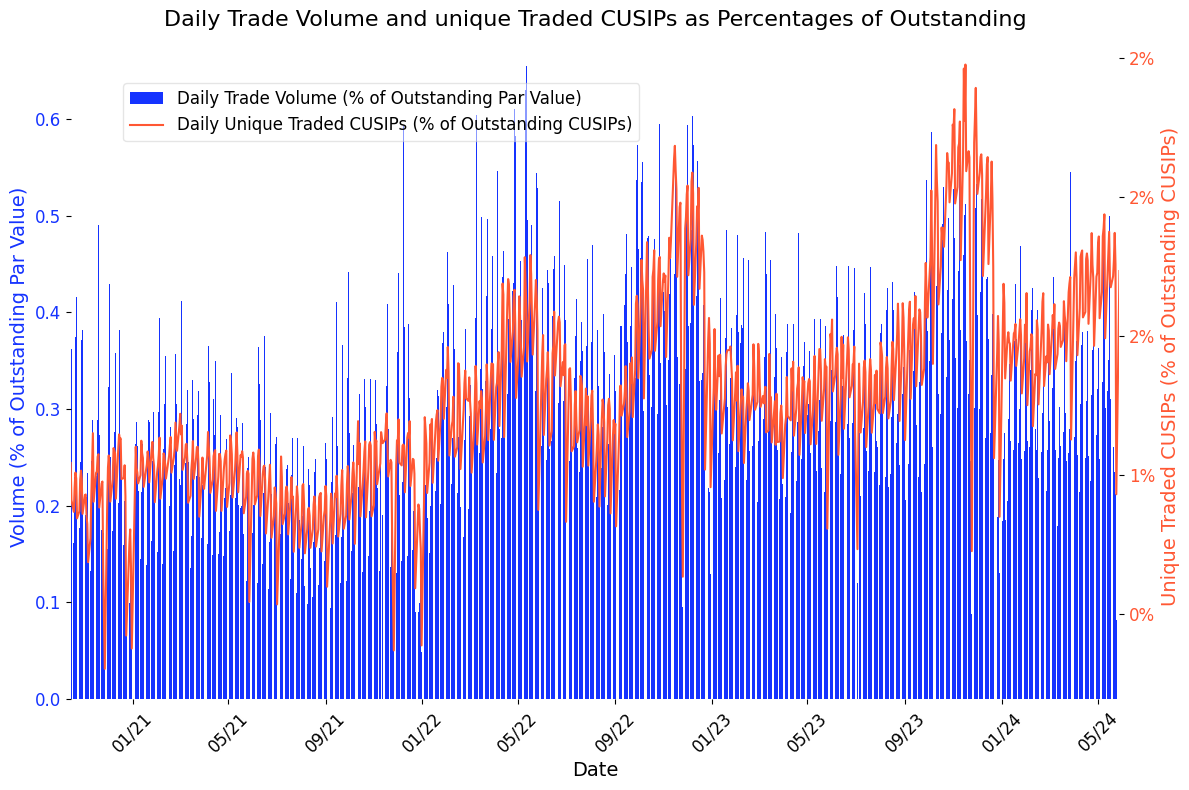

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

# Load the daily trade volume data
file_path = '/Users/gil/Downloads/trade_vol.csv'
daily_trade_volume_df = pd.read_csv(file_path)
daily_trade_volume_df['trade_date'] = pd.to_datetime(daily_trade_volume_df['trade_date'])

# Outstanding values provided

outstanding_values = {
    '2013-12-31': 3893.2,
    '2014-12-31': 3859.3,
    '2015-12-31': 3880.5,
    '2016-12-31': 3931.3,
    '2017-12-31': 3949.7,
    '2018-12-31': 3905.2,
    '2019-12-31': 3917.1,
    '2020-12-31': 4004.3,
    '2021-12-31': 4083.8,
    '2022-12-31': 4031.3,
    '2023-12-31': 4052.1
}

# Convert the outstanding values to a DataFrame
outstanding_values_df = pd.DataFrame(list(outstanding_values.items()), columns=['date', 'value'])
outstanding_values_df['date'] = pd.to_datetime(outstanding_values_df['date'])
outstanding_values_df.set_index('date', inplace=True)

# Resample to daily frequency and interpolate the values
outstanding_series = outstanding_values_df['value'].resample('D').interpolate('linear')

# Extend the outstanding values to the end date using the value for 4Q23
end_date = daily_trade_volume_df['trade_date'].max()
if end_date > outstanding_series.index.max():
    additional_dates = pd.date_range(start=outstanding_series.index.max() + pd.Timedelta(days=1), end=end_date, freq='D')
    additional_values = pd.Series(4100.0, index=additional_dates)
    outstanding_series = pd.concat([outstanding_series, additional_values])

# Map the outstanding values to the daily trade volume dataframe
daily_trade_volume_df['outstanding_bonds_bn'] = daily_trade_volume_df['trade_date'].map(outstanding_series)

# Calculate the daily trade volume as a percentage of total outstanding bonds
daily_trade_volume_df['trade_volume_percent'] = (daily_trade_volume_df['total_trade_volume_Bn'] / daily_trade_volume_df['outstanding_bonds_bn']) * 100

# Calculate the daily unique traded CUSIPs as a percentage of total outstanding CUSIPs
daily_trade_volume_df['distinct_traded_cusips_percent'] = (daily_trade_volume_df['distinct_traded_cusips'] / daily_trade_volume_df['total_outstanding_cusips']) * 100

# Plot settings
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot daily trade volume as a percentage of total outstanding on primary Y-axis
ax1.bar(daily_trade_volume_df['trade_date'], daily_trade_volume_df['trade_volume_percent'], color='#1533FF', label='Daily Trade Volume (% of Outstanding Par Value)', width=1)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Volume (% of Outstanding Par Value)', fontsize=14, color='#1533FF')
ax1.tick_params(axis='y', labelcolor='#1533FF', labelsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# Set x-axis limits to match the range of the data
ax1.set_xlim(daily_trade_volume_df['trade_date'].min(), daily_trade_volume_df['trade_date'].max())

# Secondary Y-axis for distinct traded CUSIPs
ax2 = ax1.twinx()
ax2.plot(daily_trade_volume_df['trade_date'], daily_trade_volume_df['distinct_traded_cusips_percent'], color='#FF5733', label='Daily Unique Traded CUSIPs (% of Outstanding CUSIPs)')
ax2.set_ylabel('Unique Traded CUSIPs (% of Outstanding CUSIPs)', fontsize=14, color='#FF5733')
ax2.tick_params(axis='y', labelcolor='#FF5733', labelsize=12)

# Format the secondary Y-axis as a percentage
def percent_formatter(x, pos):
    return f'{x:.0f}%'

ax2.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Title and legend
plt.title("Daily Trade Volume and unique Traded CUSIPs as Percentages of Outstanding", fontsize=16)
fig.tight_layout()

# Custom legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), prop={'size': 12}, framealpha=0.5)

# Remove borders of the main plot
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

plt.show()



